# Introduction
### This project analyzes and visualizes historical data of Bitcoin prices in USD on Kraken and makes predictions for future using basic machine learning

- Kraken: a leading US-based cryptocurrency exchange
- Libraries used:
    - Pandas: used for data manipulation and organization through the use of data frames
    - NumPy: used for creating multi-dimensional arrays of data
    - Matplotlib: used for data visualization (graphs and charts)
    - Scikit-learn (MinMaxScaler): used to change the data points into the same scale
    - Keras: used for deep learning prediction models (uses a TensorFlow backend)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# deep learning library to build ml models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


### Using Pandas to set up a data frame to read in the data

In [4]:
# Setting up the data frame
df = pd.read_csv('venv/Kraken_BTCUSD_d.csv', header=0)
data = df.iloc[::-1]  # reverse data frame to make the prices go in chronological order
data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
2313,2013-10-06,BTCUSD,238.00,238.00,122.00,122.00,0.10,12.20
2312,2013-10-07,BTCUSD,122.00,123.61,122.00,123.61,0.10,12.36
2311,2013-10-08,BTCUSD,123.61,124.19,123.61,124.18,3.99,495.14
2310,2013-10-09,BTCUSD,124.18,124.18,123.84,123.84,2.82,349.95
2309,2013-10-10,BTCUSD,123.84,125.86,123.84,125.86,2.00,251.71


### Using Matplotlib to visualize the data

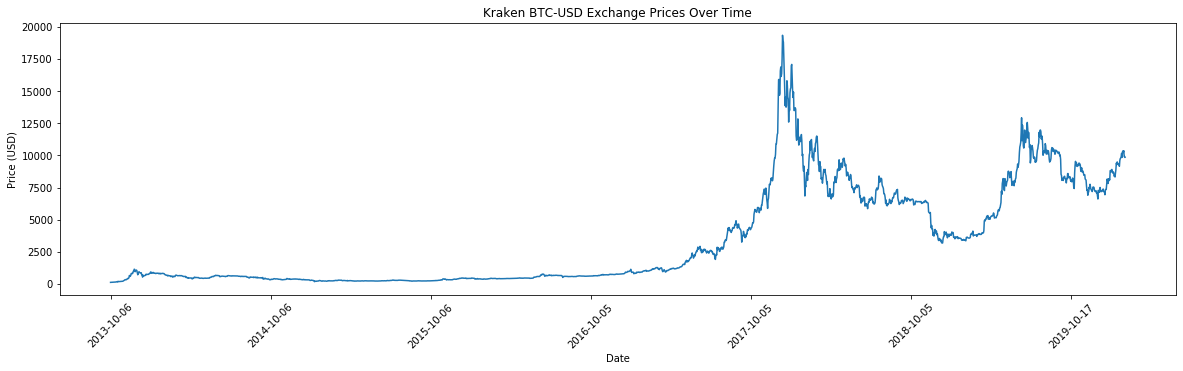

In [17]:
# Line Graph for the real data set
plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['Close'])
plt.xticks(data['Date'][::365])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Kraken BTC-USD Exchange Prices Over Time')
plt.show()

### Using Scikit-learn MinMaxScaler to set up the price data

In [6]:
price_data = data.iloc[:, 5:6] #getting only the close price data
scaler = MinMaxScaler()

#scales the data points to much smaller values so they can easily be used in an ml model
price_data = scaler.fit_transform(price_data)

### Creating training and test sets from the data

In [7]:
# splitting the data (80% for training and 20% for testing)
split = int(len(price_data) * 0.8)
train_set = price_data[:split]
test_set = price_data[split:]

x_train = train_set[0:len(train_set)-1]  # input data
y_train = train_set[1:len(train_set)]    # target data

# test set for x-values and y-values
x_test = test_set[0:len(test_set)-1]
y_test = test_set[1:len(test_set)]

# reshaping input data into a numpy array that can be used in our model
x_train = np.reshape(x_train, (len(x_train), 1, x_train.shape[1]))
x_test = np.reshape(x_test, (len(x_test), 1, x_test.shape[1]))

### Using a Keras Sequential deep learning model
- LSTM (Long Short Term Memory): a type of Recurrent Neural Network capable of retaining information for large amounts of time
- Mean Squared Error: a loss function that will get minimized as the model learns
- Adam Optimizer: an efficient algorithm to iteratively predict values based on training data
- Epoch: an iteration of the model's learning process

In [11]:
model = Sequential()  # initialize a sequential keras model
# add an LSTM Layer to the model (input)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(128))  # add a second LSTM layer to make a deeper and stronger network
model.add(Dense(1))   # followed by a dense layer to make sure there is a 1-dimensional output

# compile model using an adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, shuffle=False)  # fits the model to the data, with a set number of iterations

Epoch 1/50
1850/1850 [==============================] - 1s 732us/step - loss: 0.0217
Epoch 2/50
1850/1850 [==============================] - 0s 186us/step - loss: 0.0382
Epoch 3/50
1850/1850 [==============================] - 0s 177us/step - loss: 0.0167
Epoch 4/50
1850/1850 [==============================] - 0s 168us/step - loss: 0.0044
Epoch 5/50
1850/1850 [==============================] - 0s 166us/step - loss: 7.2787e-04
Epoch 6/50
1850/1850 [==============================] - 0s 174us/step - loss: 2.4119e-04
Epoch 7/50
1850/1850 [==============================] - 0s 172us/step - loss: 3.3841e-04
Epoch 8/50
1850/1850 [==============================] - 0s 167us/step - loss: 2.3680e-04
Epoch 9/50
1850/1850 [==============================] - 0s 169us/step - loss: 2.5698e-04
Epoch 10/50
1850/1850 [==============================] - 0s 170us/step - loss: 2.3602e-04
Epoch 11/50
1850/1850 [==============================] - 0s 183us/step - loss: 2.3067e-04
Epoch 12/50
1850/1850 [============

In [9]:
predicted_price = model.predict(x_test)  # Generates output predictions for the input samples in a numpy array.
predicted_price = scaler.inverse_transform(predicted_price)  # scales the predicted data back up
real_price = scaler.inverse_transform(y_test)   # scales the real data back up

### Plotting the predicted values and and real values to visualize the accuracy of the model

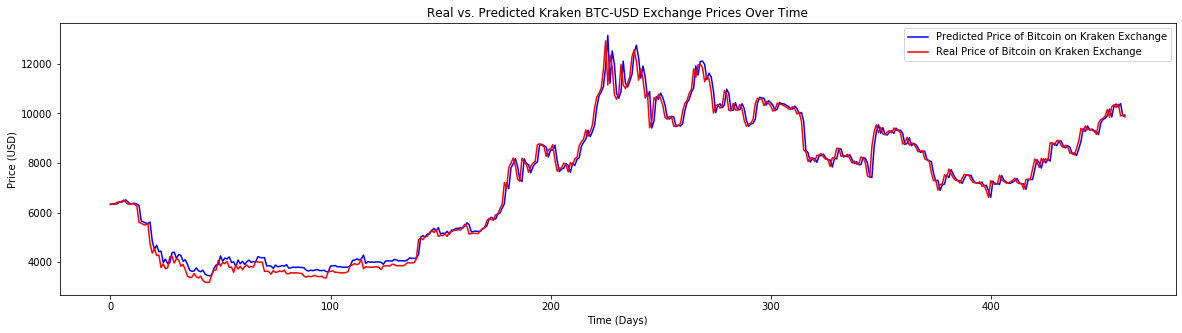

In [16]:
# Line Graph to show the predicted price vs the real price
plt.figure(figsize=(20, 5))
plt.plot(predicted_price, color='blue', label='Predicted Price of Bitcoin on Kraken Exchange')
plt.plot(real_price, color='red', label='Real Price of Bitcoin on Kraken Exchange')
plt.title('Real vs. Predicted Kraken BTC-USD Exchange Prices Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Conclusion

### The line graph shows that my model was quite accurate since the graphs of both sets of data are almost identical. It starts off inaccurate and then starts to improve its accuracy. This makes sense since the model will learn by predicting values and using the loss functions and accuracy metrics to make better predictions in the future.

### Hedge funds and cryptocurrency investors probably use similar programs and algorithms to predict the stock/crypto market.

## References
- [Keras](https://keras.io/)
- [NumPy](https://numpy.org/devdocs/)
- [Pandas](https://pandas.pydata.org/docs/)
- [Jupyter Notebook](https://jupyter.org/documentation)
- [Historical Kraken BTCUSD Data](https://www.cryptodatadownload.com/)

# a project by Santhosh Raghavan